**Progetto: Segmentazione della clientela di un'azienda di servizi finanziari**

In [ ]:
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

dataset_original = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv")
dataset_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Panoramica generale sui dati.

In [ ]:
dataset = dataset_original.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Eliminazione della colonna contenente gli ID utente, considerabile come poco informativa e verifica della presenza di valori NaN.

In [ ]:
dataset = dataset.drop("CUST_ID", axis=1)
dataset.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Il numero di valori NaN è tropp esiguo per eliminare la colonna o la riga, sostituzione dei valori NaN con la media di colonna.

In [ ]:
dataset["MINIMUM_PAYMENTS"] = SimpleImputer(strategy="mean").fit_transform(dataset[["MINIMUM_PAYMENTS"]])
dataset["CREDIT_LIMIT"] = SimpleImputer(strategy="mean").fit_transform(dataset[["CREDIT_LIMIT"]])
dataset.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

*Analisi multivariata.*

Nel caso di addestramento di un modello di clustering in cui non è presente una variabile target, un approccio iniziale con tecniche di analisi multivariata si può rivelare più efficace.

Grafico di correlazione per individuare le features maggiormente correlate.

<Axes: >

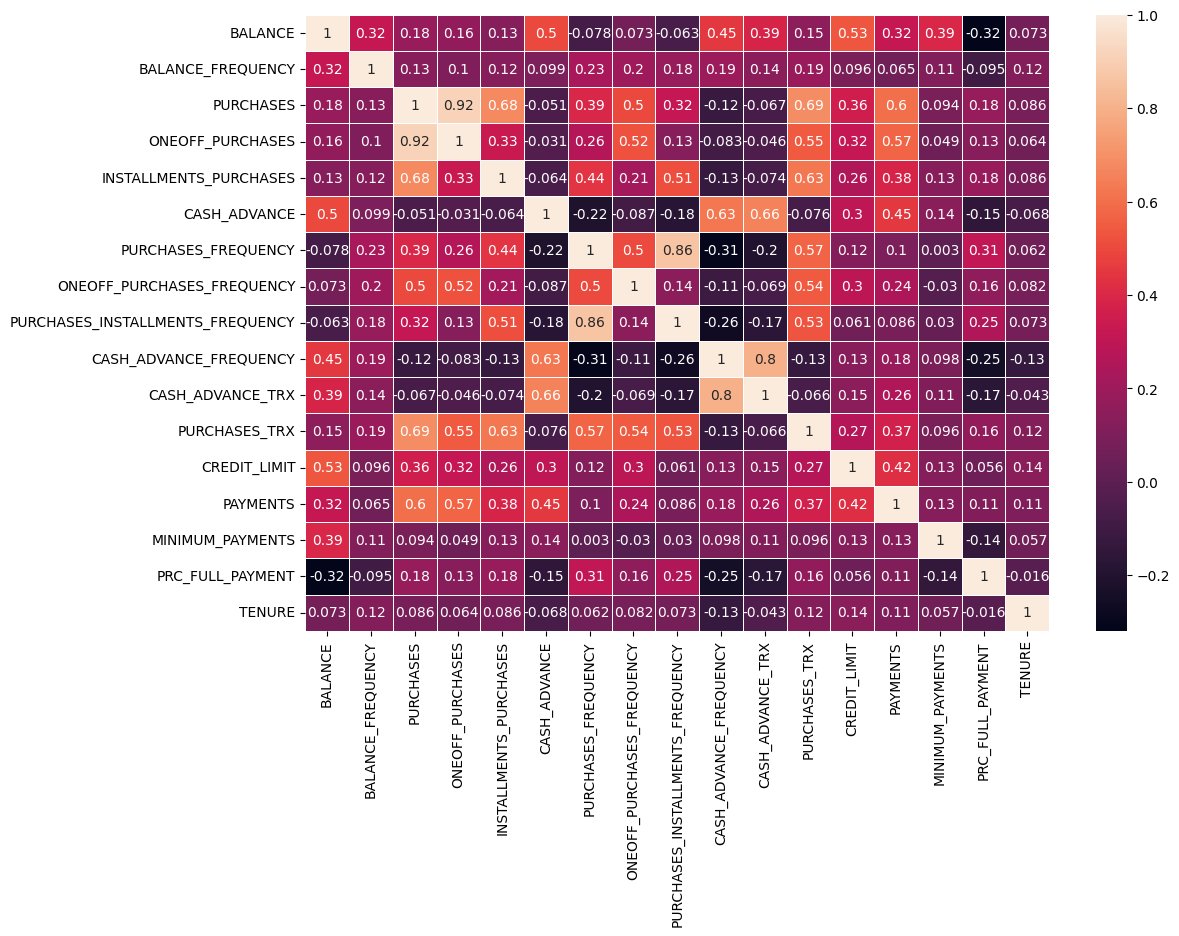

In [ ]:
ply.rcParams["figure.figsize"] = [12, 8]
sns.heatmap(dataset.corr(), annot=True, annot_kws={"size":10}, linewidths=.5)

*Eliminazione delle features.*

Eliminazione delle variabili maggiormente correlate tra loro per ridurre la ridondanza e per aumentare la stabilità del modello. Come è visibile dal grafico la features "PURCHASES_TRX" è positivamente correlata con una serie di features.

"PURCHASES_TRX" verrà mantenuta e le altre eliminate.

In [ ]:
dataset[["PURCHASES_TRX", "PURCHASES"]].corr()

,PURCHASES_TRX,PURCHASES
PURCHASES_TRX,1.000000,0.689561
PURCHASES,0.689561,1.000000


In [ ]:
dataset[["PURCHASES_TRX", "ONEOFF_PURCHASES"]].corr()

,PURCHASES_TRX,ONEOFF_PURCHASES
PURCHASES_TRX,1.000000,0.545523
ONEOFF_PURCHASES,0.545523,1.000000


In [ ]:
dataset[["PURCHASES_TRX", "INSTALLMENTS_PURCHASES"]].corr()

,PURCHASES_TRX,INSTALLMENTS_PURCHASES
PURCHASES_TRX,1.000000,0.628108
INSTALLMENTS_PURCHASES,0.628108,1.000000


In [ ]:
dataset[["PURCHASES_TRX", "PURCHASES_FREQUENCY"]].corr()

,PURCHASES_TRX,PURCHASES_FREQUENCY
PURCHASES_TRX,1.00000,0.56843
PURCHASES_FREQUENCY,0.56843,1.00000


In [ ]:
dataset[["PURCHASES_TRX", "ONEOFF_PURCHASES_FREQUENCY"]].corr()

,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY
PURCHASES_TRX,1.000000,0.544869
ONEOFF_PURCHASES_FREQUENCY,0.544869,1.000000


In [ ]:
dataset[["PURCHASES_TRX", "PURCHASES_INSTALLMENTS_FREQUENCY"]].corr()

,PURCHASES_TRX,PURCHASES_INSTALLMENTS_FREQUENCY
PURCHASES_TRX,1.000000,0.529975
PURCHASES_INSTALLMENTS_FREQUENCY,0.529975,1.000000


In [ ]:
dataset[["CASH_ADVANCE_TRX", "CASH_ADVANCE"]].corr()

,CASH_ADVANCE_TRX,CASH_ADVANCE
CASH_ADVANCE_TRX,1.000000,0.656498
CASH_ADVANCE,0.656498,1.000000


In [ ]:
dataset[["CASH_ADVANCE_TRX", "CASH_ADVANCE_FREQUENCY"]].corr()

,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX,1.000000,0.799561
CASH_ADVANCE_FREQUENCY,0.799561,1.000000


In [ ]:
dataset = dataset.drop(["PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE", "CASH_ADVANCE_FREQUENCY"], axis=1)

Grafico con le correlazioni delle features rimaste.

<Axes: >

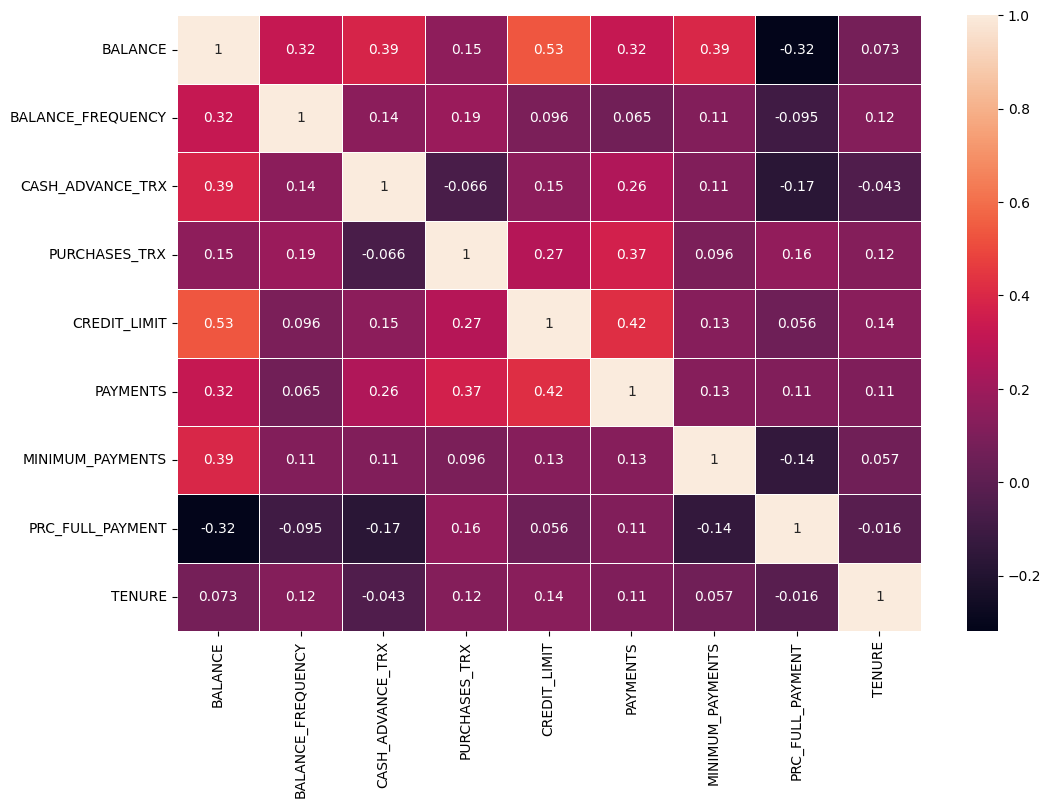

In [ ]:
sns.heatmap(dataset.corr(), annot=True, annot_kws={"size":10}, linewidths=.5)

Definizione della funzione per l'identificazione del numero ideale di centroidi: dopo aver standardizzato il dataset contenete i valori della variabili prese in esame, viene svolto un ciclo iterando su una serie di numeri interi che vengono di volta in volta usati per valorizzare il paramtero del numero di cluster, di seguito viene stampato il grafico.

La funzione per l'addestramento del modello: dopo aver standardizzato il dataset contenete i valori della variabili prese in esame, esegue l'addestramento del modello. Il parametro init="k-means++" permette un organizzazion dei centroidi sempre in maniera casuale ma tenendo in considerazione la posizione di quelli già presenti. In ultimo visualizza il grafico e la metrica "inerzia" viene stampata direttamente nel grafico.

I valori vengono standardizzati in questo passaggio perchè la correlazione usata non è particolarmente sensibile ai valori estremi, mentre il modello di clustering è molto sensibile a questi valori.

In [ ]:
def Elbow_method(X):
    """
    Svolge il ciclo per identificare il numero di cluster adeguato, visualizza il grafico.
    X = variabili in esame.
    """

    ss = StandardScaler()
    X_std = ss.fit_transform(X)

    ssd = {}
    for k in range(1, 9):
         kmeans = KMeans(n_clusters=k, init="k-means++").fit(X_std)
         ssd[k] = kmeans.inertia_

    ply.plot(list(ssd.keys()), list(ssd.values()), marker="o")
    ply.xlabel("Numero di cluster", fontsize=14)
    ply.ylabel("Somma delle distanza al quadrato", fontsize=14)



def clusters(X, n, xlabel, ylabel):
    """
    Addestramento del modello di clustering, visualizza il grafico.
    X = variabili in esame, n = numero di cluster, xylabel = label per asse.
    """
    ss = StandardScaler()
    X_std = ss.fit_transform(X)

    kmeans = KMeans(n_clusters=n, init="k-means++")
    kmeans.fit(X_std)

    y_kmeans = kmeans.predict(X_std)

    sns.scatterplot(x=X_std[:,0], y=X_std[:,1], hue=y_kmeans, s=100)
    ply.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

    ply.xlabel(xlabel)
    ply.ylabel(ylabel)

    ply.text(X_std[:,0].max()-1.5, X_std[:,1].max()-1, f"SSD={kmeans.inertia_:.2f}")


In questo caso specifico Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing per per promuovere la propria linea di carte di credito.

Verranno indagate la variabile "BALANCE" (importo del saldo rimasto sul conto per effettuare acquisti) in relazione alla variabile "PAYMENTS" (Importo dei pagamenti effettuati dall'utente).

La scelta delle variabil dipende dalla loro bassa correlazione che rende meno probabile gli effetti di distorisione dei cluster e dalle conoscenze di dominio ipotizzate. Nonostante ciò è sensato replicare l'analisi per indagare anche altre variabili.

In [ ]:
dataset[["BALANCE", "PAYMENTS"]].corr()

,BALANCE,PAYMENTS
BALANCE,1.000000,0.322802
PAYMENTS,0.322802,1.000000


Ricerca del numero di cluster adeguato.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

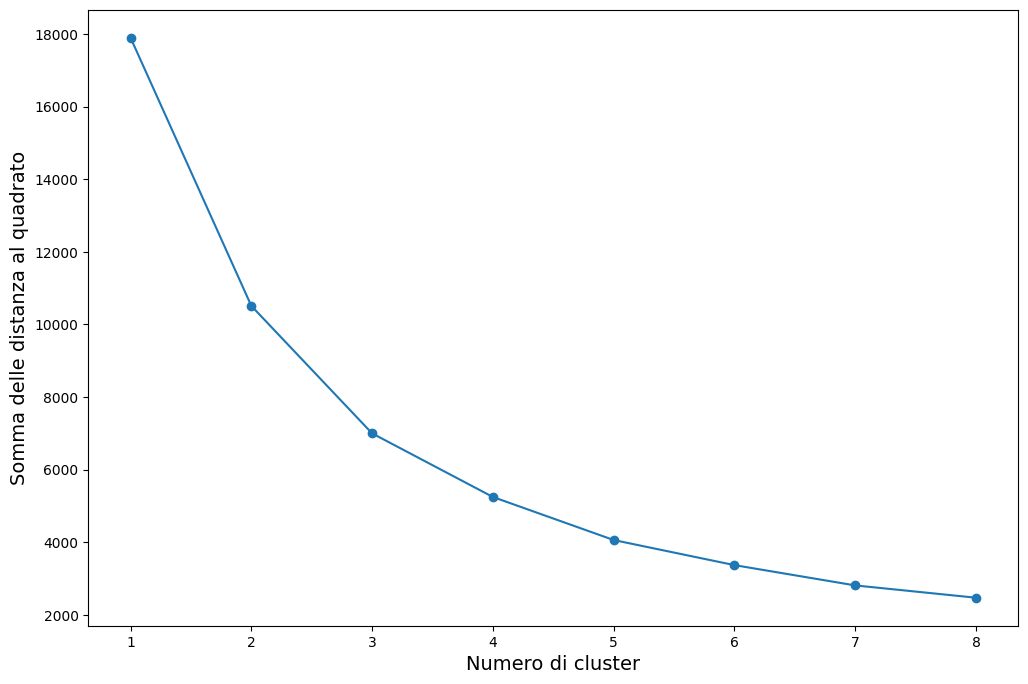

In [ ]:
X = dataset[["BALANCE", "PAYMENTS"]].values

Elbow_method(X)

*Addestramento del modello con n=4 cluster.*

Il modello identifica 4 categorie differenti, la categoria di maggior interesse sembra essere la 2 dove a bassi valori di "BALANCE" corrispondono alti valori di "PAYMENTS", quindi, basso importo del saldo sul conto corrispondono alti importi di pagamento, un tipo di clientela che potrebbe essere interessata ad una carta di credito.

La numero 3 rimane un opzione valida.

Le categorie meno d'interesse sembrano essere la numero 1 e la 0 dove ai valori di "BALANCE" corrispondono bassi valori di "PAYMENTS".

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


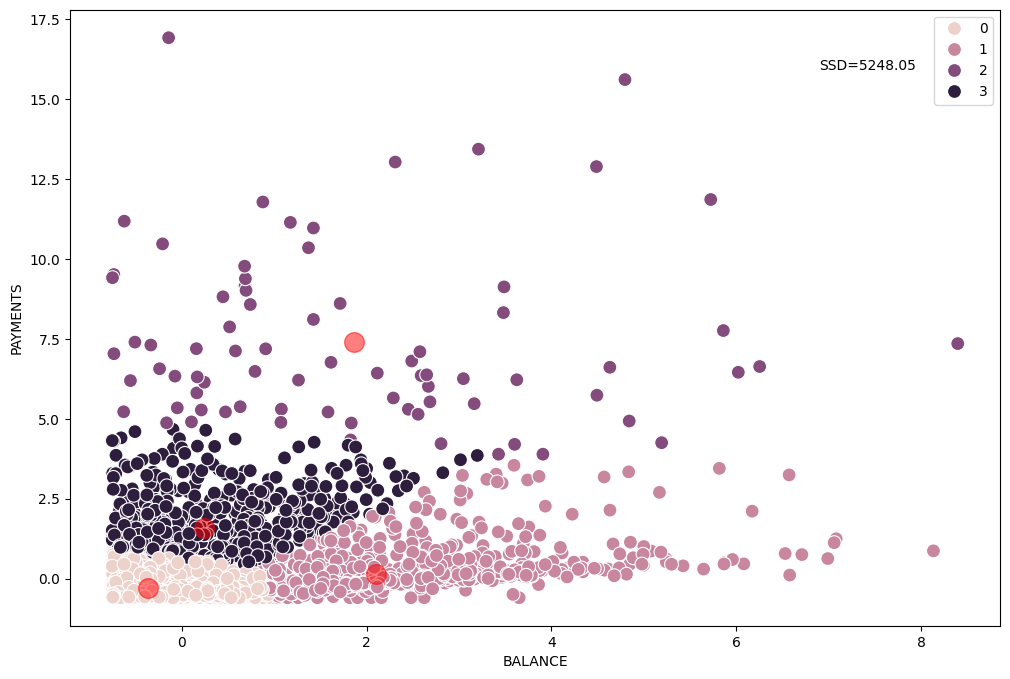

In [ ]:
clusters(X, 4, "BALANCE", "PAYMENTS")

*Analisi univariata.*

Utilizzo dell'analisi statistica e dei grafici per indagare la variabile "BALANCE".

La distribuzione della features "BALANCE" presenta una distribuzione asimmetrica, con outlier per valori superiori a 5000. Buona prassi sarebbe eliminare gli outlier e procedere con l'addestramento del modello, ma in questo caso specifico le informazioni rappresentate dagli outlier possono essere utli in quanto possono far riferimento ad una classe di persone ad altissimo reddito (potenziali clienti paganti), che andrebbe ulteriormente analizzata.

In [ ]:
dataset["BALANCE"].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [ ]:
dataset["BALANCE"].value_counts()

BALANCE
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: count, Length: 8871, dtype: int64

Text(0, 0.5, 'Frequenza')

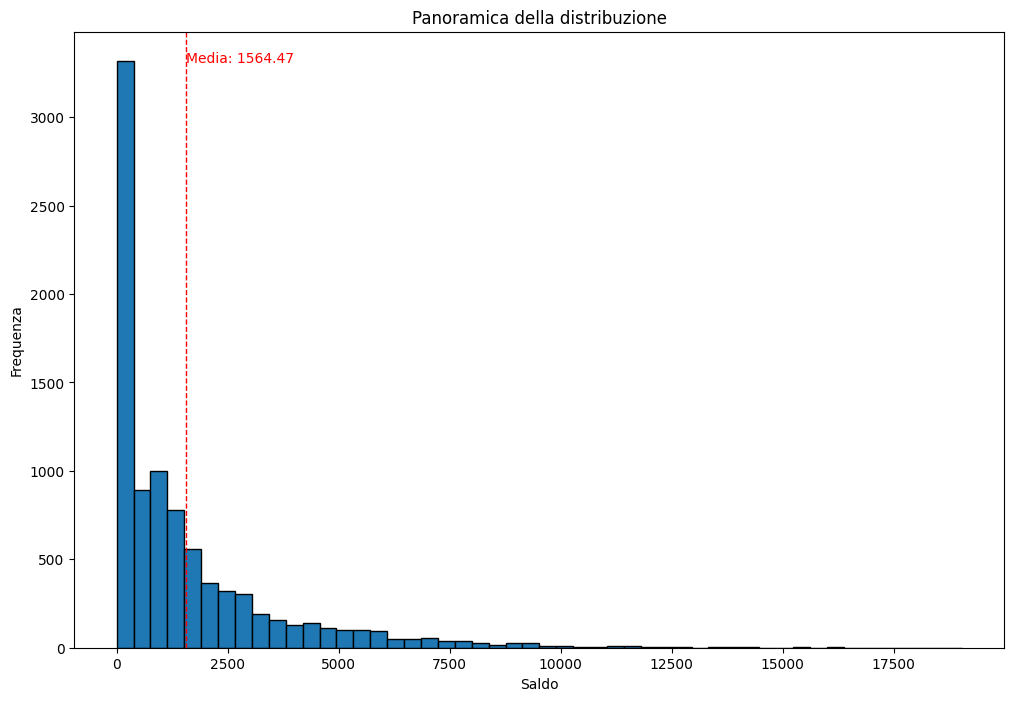

In [ ]:
mean = dataset["BALANCE"].mean()

ply.hist(dataset["BALANCE"], bins=50, edgecolor="black")
ply.axvline(mean, color="red", linestyle="dashed", linewidth=1)
ply.text(mean, ply.gca().get_ylim()[1]*0.95, f"Media: {mean:.2f}", color = "red")

ply.title("Panoramica della distribuzione")
ply.xlabel("Saldo")
ply.ylabel("Frequenza")

<Axes: ylabel='BALANCE'>

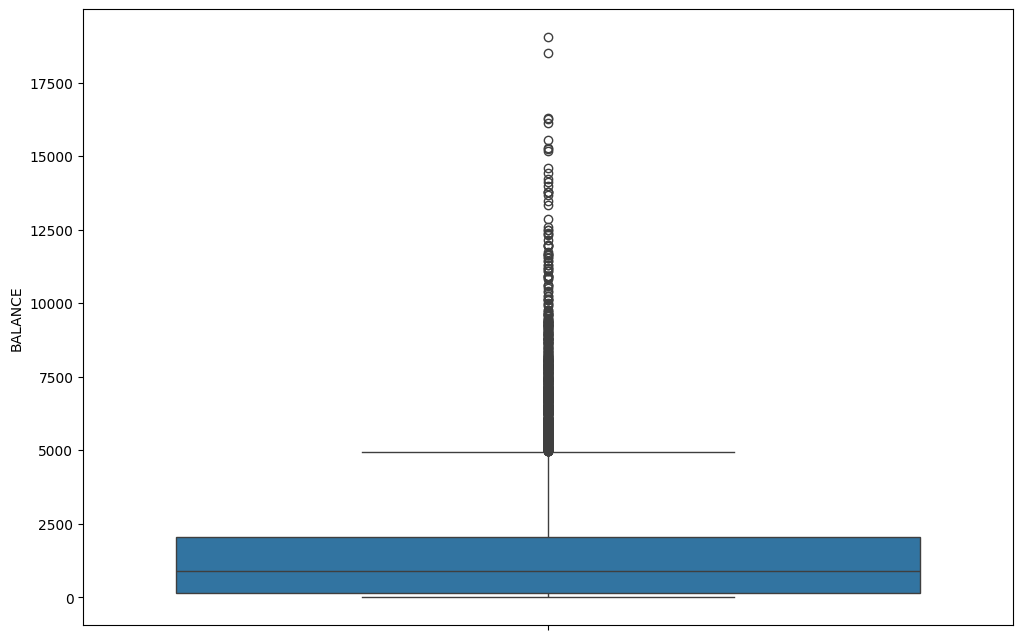

In [ ]:
sns.boxplot(dataset["BALANCE"])

Divisione della features "BALANCE" in tre gruppi: tra il minimo e la media (fascia bassa), tra la media e 5000 (fascia media), da 5000 al massimo (fascia alta).

*Fascia bassa.*

In [ ]:
balance_0_to_mean = dataset[dataset["BALANCE"] <= dataset["BALANCE"].mean()][["BALANCE", "PAYMENTS"]]
balance_0_to_mean

,BALANCE,PAYMENTS
0,40.900749,201.802084
4,817.714335,678.334763
6,627.260806,6354.314328
8,1014.926473,688.278568
9,152.225975,1164.770591
...,...,...
8945,28.493517,325.594462
8946,19.183215,275.861322
8947,23.398673,81.270775
8948,13.457564,52.549959


Ricerca del numero di cluster adeguato.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

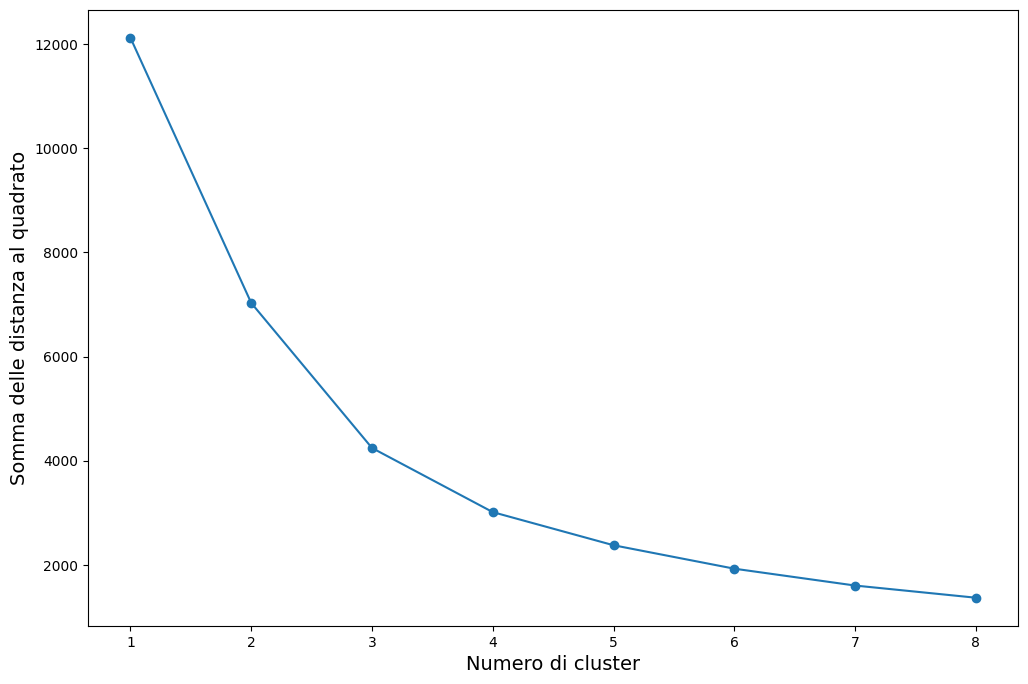

In [ ]:
X = balance_0_to_mean.values

Elbow_method(X)

Addestramento del modello con 4 cluster.

Il modello identifica 4 categorie differenti, la categoria di maggior interesse sembra essere la 2 dove sia per bassi che per altri valori di "BALANCE" corrispondono alti valori di "PAYMENTS", quindi basso importo del saldo sul conto corrispondono alti importi di pagamento.

La categoria 3 si presenta come una possibile opzione.

La categoria meno d'interesse sembra essere la numero 0 e 1 dove ai valori di "BALANCE" corrispondono bassissimi valori di "PAYMENTS".

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


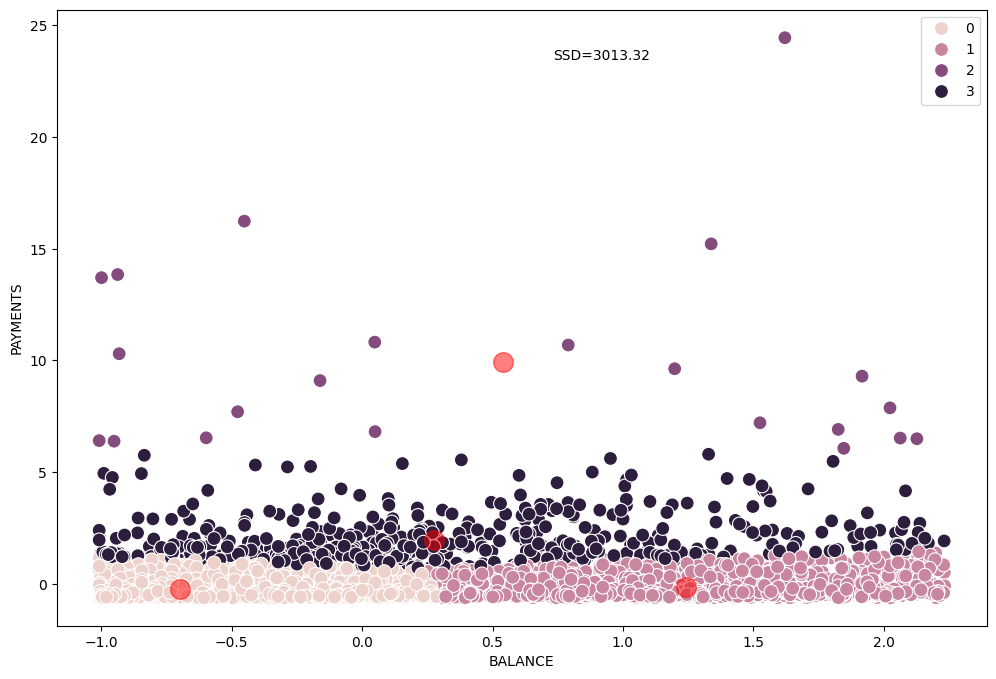

In [ ]:
clusters(X, 4, "BALANCE", "PAYMENTS")

*Fascia media.*

In [ ]:
balance_mean_to_5000 = dataset[(dataset["BALANCE"] > dataset["BALANCE"].mean()) & (dataset["BALANCE"] <= 5000)][["BALANCE", "PAYMENTS"]]
balance_mean_to_5000

,BALANCE,PAYMENTS
1,3202.467416,4103.032597
2,2495.148862,622.066742
3,1666.670542,0.000000
5,1809.828751,1400.057770
7,1823.652743,679.065082
...,...,...
8840,2588.410789,1739.406636
8857,2330.222764,8157.666434
8869,2171.222526,300.088696
8881,2150.940844,631.429223


Ricerca del numero di cluster adeguato.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

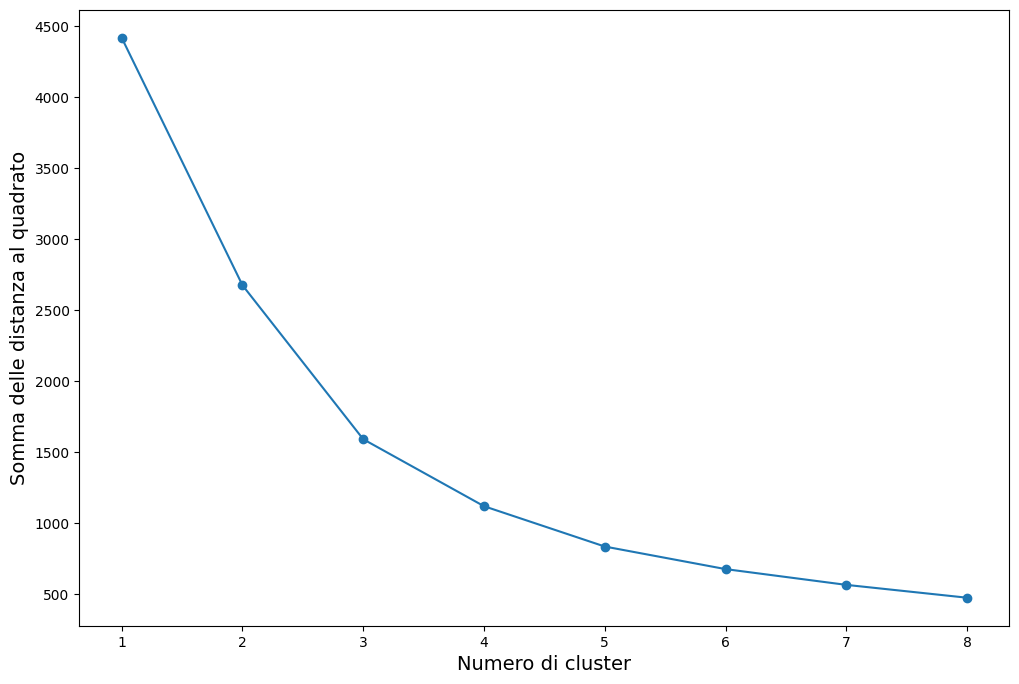

In [ ]:
X = balance_mean_to_5000.values

Elbow_method(X)

Addestramento del modello con 5 cluster.

Il modello identifica 5 categorie differenti, la categoria di maggior interesse sembra essere la 3 dove sia per bassi che per altri valori di "BALANCE" corrispondono alti valori di "PAYMENTS", quindi, basso importo del saldo sul conto corrispondono alti importi di pagamento.

La categoria 1 si presenta come una possibile opzione.

Le categorie meno d'interesse sembrano essere le numero 0, la 2 e 4 dove ai valori di "BALANCE" corrispondono bassissimi valori di "PAYMENTS".

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


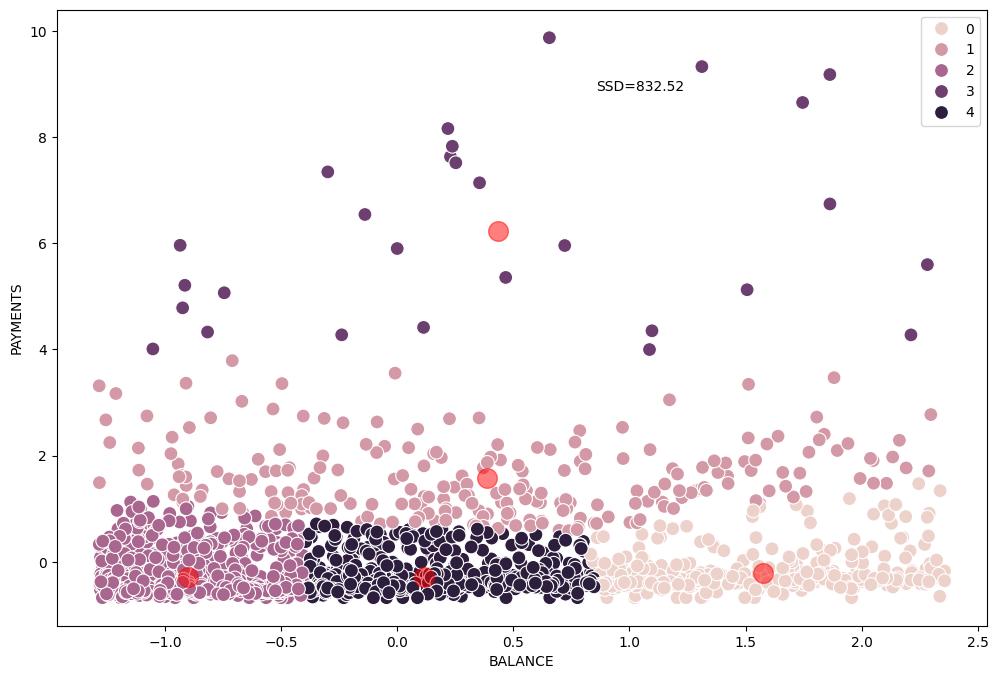

In [ ]:
clusters(X, 5, "BALANCE", "PAYMENTS")

*Fascia alta.*

In [ ]:
balance_5000_to_sky = dataset[(dataset["BALANCE"] > 5000) & (dataset["BALANCE"] <= dataset["BALANCE"].max())][["BALANCE", "PAYMENTS"]]
balance_5000_to_sky

,BALANCE,PAYMENTS
15,6886.213231,1993.439277
21,6369.531318,2077.959051
24,5368.571219,1422.726707
28,7152.864372,1601.448347
30,12136.219960,4230.323491
...,...,...
8309,6008.914524,1279.301117
8411,5934.610587,1065.956065
8438,5484.339435,1229.434538
8705,7302.672686,3824.308564


Ricerca del numero di cluster adeguato.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

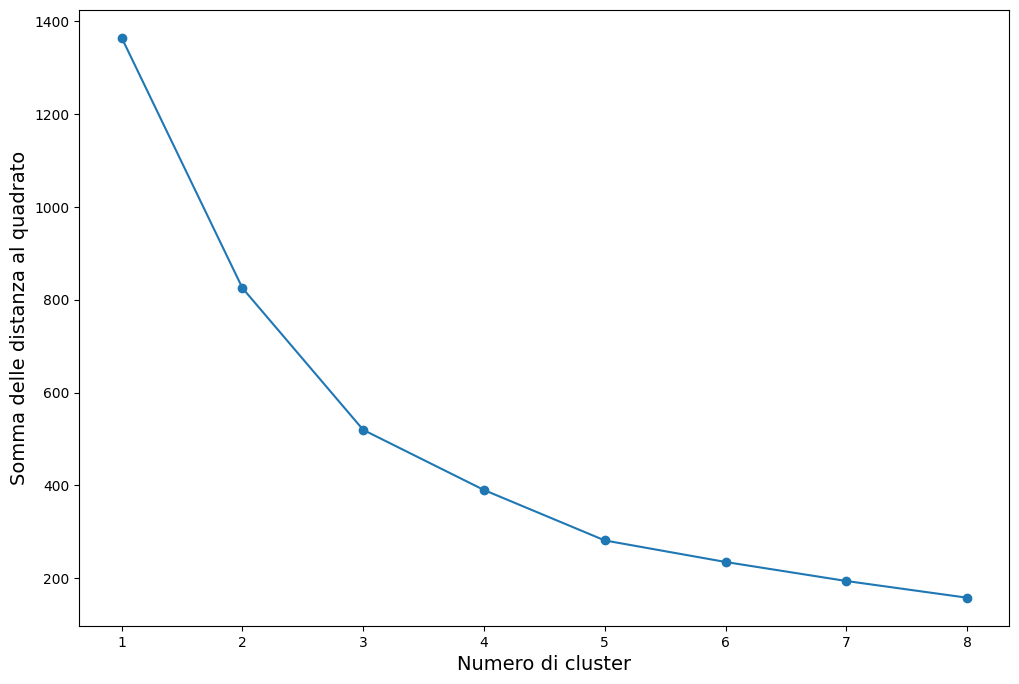

In [ ]:
X = balance_5000_to_sky.values

Elbow_method(X)

Addestramento del modello con 5 cluster.

Il modello identifica 5 categorie differenti, la categoria di maggior interesse sembra essere la 4 dove sia per bassi che per altri valori di "BALANCE"
corrispondono alti valori di "PAYMENTS", quindi basso importo del saldo sul conto corrispondono alti importi di pagamento.

La catecoria 1 si presenta come una possibile opzione.

La categoria meno d'interesse sembra essere la numero 0, la 2 e 3 dove a bassi/medi/alti valori di "BALANCE" corrispondono bassissimi valori di "PAYMENTS".

Bisogna notare che questo cluster è stato costruito basandosi sui dati outlier considerati informativi perchè reppresentatvi di una fascia altissima
di clientela. Nonostante ciò, il modello di clustering è molto sensibile a questi valori e i cluster stessi possono essere poco rappresentativi, inoltre il numero di osservazioni è stato drasticamente ridotto.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


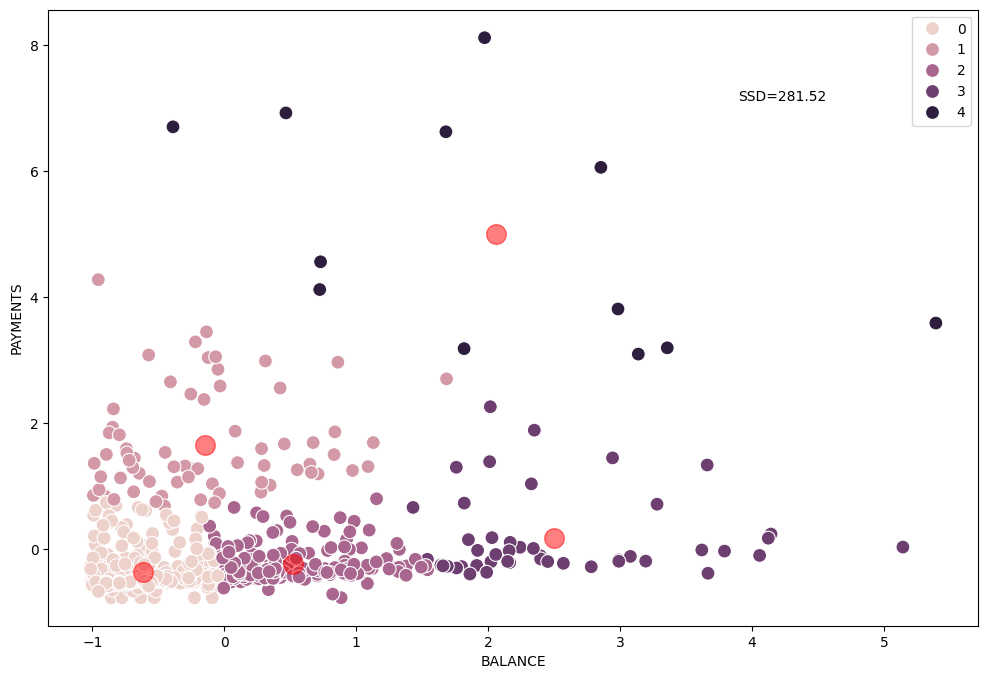

In [ ]:
clusters(X, 5, "BALANCE", "PAYMENTS")

*Conclusione.*

Il modello migliore potrebbe essere costituito sia dal modello di fascia bassa che di fascia medi entrambe con le categorie sopra indicate, in quanto la metrica dell'SSD rimane relativametne bassa e nella features "BALANCE" non sono presenti outlier.